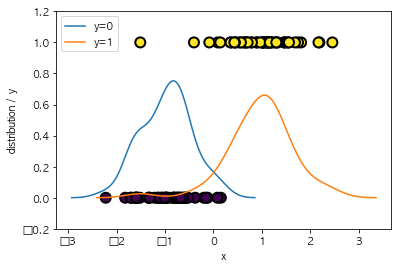

In [1]:
# Logistic Regression
# ref: https://datascienceschool.net/view-notebook/d0df94cf8dd74e8daec7983531f68dfc/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.datasets import make_classification
from matplotlib import rc
import warnings
warnings.filterwarnings(action="ignore")
rc('font', family="AppleGothic")
%matplotlib inline

# one feature
from sklearn.datasets import make_classification
X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                            n_clusters_per_class=1, random_state=4)
plt.scatter(X0, y, c=y, s=100, edgecolor="k", linewidth=2)
sns.distplot(X0[y==0, :], label="y=0", hist=False)
sns.distplot(X0[y==1, :], label="y=1", hist=False)
plt.ylim(-0.2, 1.2)
plt.xlabel('x')
plt.ylabel('distribution / y')
plt.show()

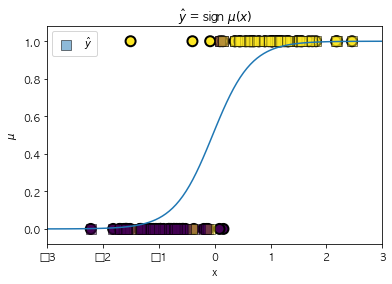

In [2]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X0,y)
xx = np.linspace(-3, 3, 100)
mu = 1/(1+np.exp(-model.coef_[0][0]*xx-model.intercept_[0]))
plt.plot(xx, mu)
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2)
plt.scatter(X0, model.predict(X0), label=r"$\hat{y}$", marker="s", c=y,
            s=100, edgecolor="k", lw=1, alpha=0.5)
plt.xlim(-3,3)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y}$ = sign $\mu(x)$")
plt.legend()
plt.show()

              precision    recall  f1-score   support

      setosa       0.94      0.98      0.96        50
  versicolor       0.81      0.42      0.55        50
   virginica       0.62      0.90      0.74        50

    accuracy                           0.77       150
   macro avg       0.79      0.77      0.75       150
weighted avg       0.79      0.77      0.75       150

Confusion matrix w/o normalization
[[49  1  0]
 [ 2 21 27]
 [ 1  4 45]]


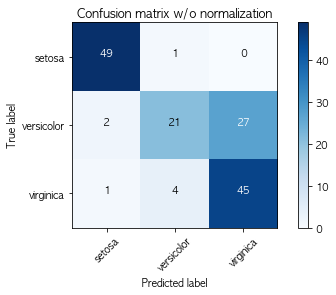

In [3]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, classification_report
import itertools

iris = load_iris()
X = iris.data[:,:2]
y = iris.target

def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = "Normalized confusion matrix"
        #print("Normalized confusion matrix")
    else:
        title = "Confusion matrix w/o normalization"
        #print("Confusion matrix w/o normalization")
    print(title)
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

model = LogisticRegression().fit(X, y)
y_pred = model.predict(X)
class_names=iris.target_names
print(classification_report(y, y_pred, target_names=class_names))

cnf_matrix = confusion_matrix(y, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names)

In [11]:
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

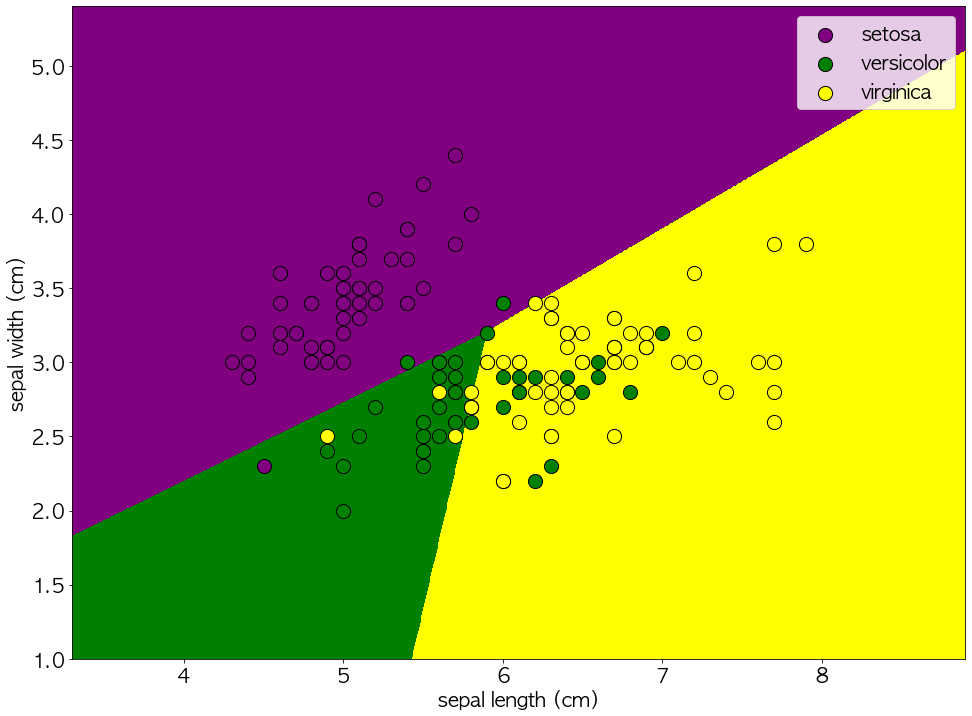

In [30]:
x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
X1, X2 = np.meshgrid(np.linspace(x1_min,x1_max,1000),
                     np.linspace(x2_min,x2_max,1000))

ZZ = model.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)
x1_label = "{}".format(iris.feature_names[0])
x2_label = "{}".format(iris.feature_names[1])
y_label = ["{}".format(i) for i in class_names]

fig = plt.figure(figsize=(16,12))
ax  = fig.subplots()
mpl.rcParams["font.size"] = 20
#cmap = plt.cm.viridis
cmap = mpl.colors.ListedColormap(["purple","green","yellow"])
ax.contourf(X1, X2, ZZ, cmap=cmap)
#ax.scatter(X[:,0], X[:,1], c=y, s=30, edgecolor="k", 
#            linewidth=2, label=y_label)
for idx, lv in enumerate(np.unique(y)):
    xx1, xx2 = X[y==lv,0], X[y==lv,1]
    yy = y[y==lv]
    ax.scatter(xx1, xx2, label=y_label[idx], c=[cmap(idx)], s=200, edgecolor="k")
    
ax.set_xlabel(x1_label)
ax.set_ylabel(x2_label)
ax.legend()
plt.show()